<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/gradientBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)

print(mnist.target)
print(mnist.data.shape)

['5' '0' '4' ... '4' '5' '6']
(70000, 784)


In [ ]:
import pandas as pd
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)

X = mnist_df[0:5000]
Y = mnist.target[0:5000]
X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2, random_state=30, stratify=Y)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
defaultClf = GradientBoostingClassifier()
defaultClf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.916
0.9144176772802975


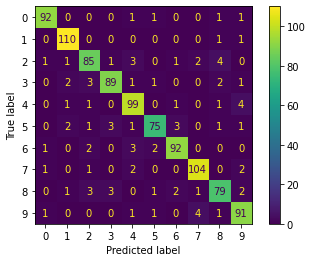

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
x = plot_confusion_matrix(defaultClf, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,defaultClf.predict(X_test)))
print(metrics.f1_score(y_test,defaultClf.predict(X_test),average='macro'))

#Observations :

- Training a single model took a lot of time. This is because, classification with more than 2 classes requires the induction of n_classes regression trees at each iteration, thus, the total number of induced trees equals n_classes * n_estimators.

- Unlike Adaboost, the classifier to be used is limited to CART.

- Hyper-parameters to tune are :
  - n_estimators : number of times trees are constructed.
  - max-depth : depths of trees constructed.
  - learning_rate : the rate at which output utilises the predictions of new set of trees.
  - (IMP) subsample : proposed stochastic gradient boosting, which combines gradient boosting with bootstrap averaging (bagging). At each iteration the base classifier is trained on a fraction subsample of the available training data. The subsample is drawn without replacement. A typical value of subsample is 0.5.


# Additional learning :

In [ ]:
_ = defaultClf.set_params(n_estimators=220, warm_start=True)  # set warm_start and new nr of trees
_ = defaultClf.fit(X_train, y_train) # fit additional 120 trees to est

In [ ]:
print(defaultClf)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=220,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)


0.924
0.9224556321279362


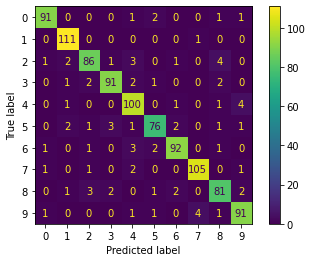

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
x = plot_confusion_matrix(defaultClf, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,defaultClf.predict(X_test)))
print(metrics.f1_score(y_test,defaultClf.predict(X_test),average='macro'))

# Effect of subsampling :

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(subsample=0.5, n_estimators=220)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=220,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.919
0.9168496601349215


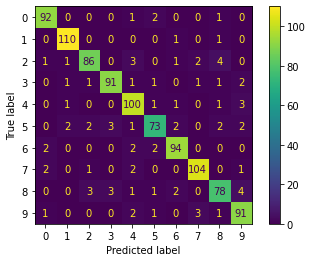

In [ ]:
x = plot_confusion_matrix(clf, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,clf.predict(X_test)))
print(metrics.f1_score(y_test,clf.predict(X_test),average='macro'))

- Small improvement; it suggests that there wasn't much overfitting.

# Cross Validation :

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
scoring = {'Accuracy': 'accuracy'}


parameters = {
              'n_estimators' : [100,200,400,800],
              'learning_rate':[0.05,0.1,0.2,0.3],
              'max_depth' : [3,5,10],
              'subsample' : [0.25,0.5,0.75]
             }

grid_random = RandomizedSearchCV(GradientBoostingClassifier(), parameters, cv=2,refit='Accuracy', scoring=scoring, return_train_score=False,n_iter=20 )

grid_random.fit(X_train, y_train)
print(grid_random)

print("---------------------------------------------------------------------------------")
# examine the best model
print(grid_random.best_score_)
print(grid_random.best_params_)
print(grid_random.best_estimator_)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

0.94
0.9386327563070926


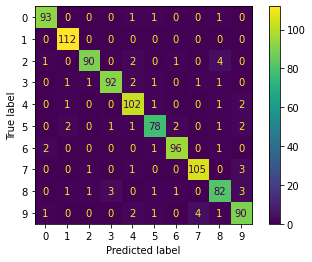

In [ ]:
x = plot_confusion_matrix(grid_random.best_estimator_, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,grid_random.best_estimator_.predict(X_test)))
print(metrics.f1_score(y_test,grid_random.best_estimator_.predict(X_test),average='macro'))

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(grid_random.cv_results_)[['params','mean_test_Accuracy']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,params,mean_test_Accuracy
0,"{'subsample': 0.75, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}",0.90950
1,"{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}",0.90025
2,"{'subsample': 0.75, 'n_estimators': 800, 'max_depth': 10, 'learning_rate': 0.05}",0.90675
3,"{'subsample': 0.75, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}",0.89400
4,"{'subsample': 0.25, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}",0.86750
5,"{'subsample': 0.25, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}",0.71275
6,"{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}",0.90375
7,"{'subsample': 0.75, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.05}",0.91675
8,"{'subsample': 0.75, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.3}",0.89525
9,"{'subsample': 0.75, 'n_estimators': 800, 'max_depth': 10, 'learning_rate': 0.1}",0.89975
